In [1]:
import numpy as np 
import pandas as pd
from utils.utils import *
from utils.plotting import *



In [2]:
processor = MatlabDataProcessor('exercise_data.50.0000_singleonly.mat')
processor.load_file()
data_df = processor.process_all_data(convert_to_df=True)

data_df['dataset'] = 'rico'
data_df.rename(columns = {'subject_id':'user_id', 'activity_name': 'label'}, inplace= True)
data_df.head()

2025-02-06 20:52:47,266 - INFO - File loaded successfully
2025-02-06 20:52:47,267 - INFO - Loaded 75 activities
2025-02-06 20:52:47,267 - INFO - Processing data matrix of shape (94, 75)
2025-02-06 20:52:50,463 - INFO - Processed 2056 valid instances out of 7050 total cells
2025-02-06 20:52:53,221 - INFO - Created final DataFrame with 7751906 rows


,timestamp,acc_X,acc_Y,acc_Z,gyr_X,gyr_Y,gyr_Z,matrix_row,matrix_col,label,user_id,activity_reps,start_time,dataset
0,52.399884,-0.678057,-0.525088,0.661963,-236.269299,-84.986143,77.036312,0,37,Pushup (knee or foot variation),3,15,52.398,rico
1,52.419884,-0.761620,-0.486444,0.510914,-60.762158,-80.643264,9.613385,0,37,Pushup (knee or foot variation),3,15,52.398,rico
2,52.439884,-0.830902,0.344620,0.452458,-2.964748,-63.789937,-49.127510,0,37,Pushup (knee or foot variation),3,15,52.398,rico
3,52.459884,-0.765491,0.053850,0.697407,-46.231902,-48.940760,-68.153642,0,37,Pushup (knee or foot variation),3,15,52.398,rico
4,52.479884,-0.737729,-0.335286,0.746702,-26.699921,-8.786237,-78.926749,0,37,Pushup (knee or foot variation),3,15,52.398,rico


In [3]:
# load in mmfit and load crossfit data
mmfit = load_mmfit()
har_data = load_crossfit()

mmfit['dataset'] = 'mmfit'
har_data['dataset'] = 'har_data'

  0%|          | 0/21 [00:00<?, ?it/s]/Users/jacobgottesman/Public/DS 4440/smartwatch-activity-recognition/utils/utils.py:319: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  raw_data = pd.concat([raw_data, df], axis =0)
  0%|          | 0/11 [00:00<?, ?it/s]/Users/jacobgottesman/Public/DS 4440/smartwatch-activity-recognition/utils/utils.py:368: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp_df], axis = 0)
100%|██████████| 11/11 [00:03<00:00,  2.91it/s]
0it [00:00, ?it/s]
0

In [4]:
both_df = pd.concat([mmfit, har_data, data_df], axis=0)
both_df = both_df.reset_index()
both_df.head()
both_df['index'] = range(len(both_df))

In [5]:
both_df['label'] = both_df['label'].apply(lambda x: x.lower().replace(' ', ''))
print(f'There are {both_df[['user_id', 'dataset']].drop_duplicates().shape[0]} unique users.')
print(f'There are {len(both_df['label'].unique())} unique labels.')

There are 172 unique users.
There are 92 unique labels.


In [6]:
both_df.isna().sum()

level_0                0
index                  0
frame            9290512
timestamp        1538606
acc_X                  0
acc_Y                  0
acc_Z                  0
gyr_X                  0
gyr_Y                  0
gyr_Z                  0
label                  0
user_id                0
dataset                0
matrix_row       3102387
matrix_col       3102387
activity_reps    3102387
start_time       3102387
dtype: int64

the columns with null are not columns that we are using

In [7]:
# top 10 activities in all datasets
both_df['label'].value_counts().head(10)

label
deviceontable                    1301735
non-e                            1149916
walk                              608204
staticstretch                     451196
staticstretch(atyourownpace)      313323
running(treadmill)                291569
dynamicstretch(atyourownpace)     284271
ellipticalmachine                 275296
rowingmachine                     267743
pushups                           224301
Name: count, dtype: int64

In [8]:
both_df.describe()

,level_0,index,frame,timestamp,acc_X,acc_Y,acc_Z,gyr_X,gyr_Y,gyr_Z,matrix_row,matrix_col,activity_reps,start_time
count,1.085429e+07,1.085429e+07,1.563781e+06,9.315687e+06,1.085429e+07,1.085429e+07,1.085429e+07,1.085429e+07,1.085429e+07,1.085429e+07,7.751906e+06,7.751906e+06,7.751906e+06,7.751906e+06
mean,2.774680e+06,5.427146e+06,3.836170e+04,2.632683e+11,-3.455203e-01,-8.180348e-01,6.234996e-01,-1.394277e+00,-4.013605e-01,1.201836e-01,4.489054e+01,3.562815e+01,8.856726e+00,1.161275e+03
std,2.570415e+06,3.133365e+06,2.381080e+04,5.861737e+11,5.204761e+00,3.643644e+00,3.152211e+00,4.843011e+01,6.233445e+01,5.819769e+01,2.855569e+01,2.173188e+01,1.449297e+01,7.168659e+02
min,0.000000e+00,0.000000e+00,8.980000e+02,5.799961e-01,-7.839857e+01,-7.847042e+01,-7.823334e+01,-1.811127e+03,-1.820821e+03,-1.346143e+03,0.000000e+00,1.000000e+00,-1.000000e+00,5.770000e-01
25%,5.852900e+04,2.713573e+06,1.936500e+04,7.144997e+02,-1.006329e+00,-8.887359e-01,-2.183634e-01,-5.669676e+00,-3.578710e+00,-3.184968e+00,1.700000e+01,1.200000e+01,-1.000000e+00,5.156470e+02
50%,2.324759e+06,5.427146e+06,3.611800e+04,1.492634e+03,-4.031501e-01,-2.889998e-01,1.700464e-01,-8.669890e-02,-2.565633e-02,-2.370521e-02,4.600000e+01,3.600000e+01,-1.000000e+00,1.166393e+03
75%,5.038332e+06,8.140719e+06,5.308400e+04,2.298652e+03,4.345653e-01,1.949397e-01,7.957402e-01,2.727230e+00,2.644113e+00,2.964756e+00,7.100000e+01,5.600000e+01,2.000000e+01,1.718402e+03
max,7.751905e+06,1.085429e+07,1.218270e+05,1.596125e+12,7.797012e+01,7.847042e+01,7.843689e+01,1.870256e+03,2.111657e+03,1.378797e+03,9.300000e+01,7.400000e+01,1.000000e+02,3.040662e+03


In [9]:
both_df[both_df['label']=='pushups']['dataset'].unique()

array(['mmfit', 'har_data', 'rico'], dtype=object)

(154126, 17)


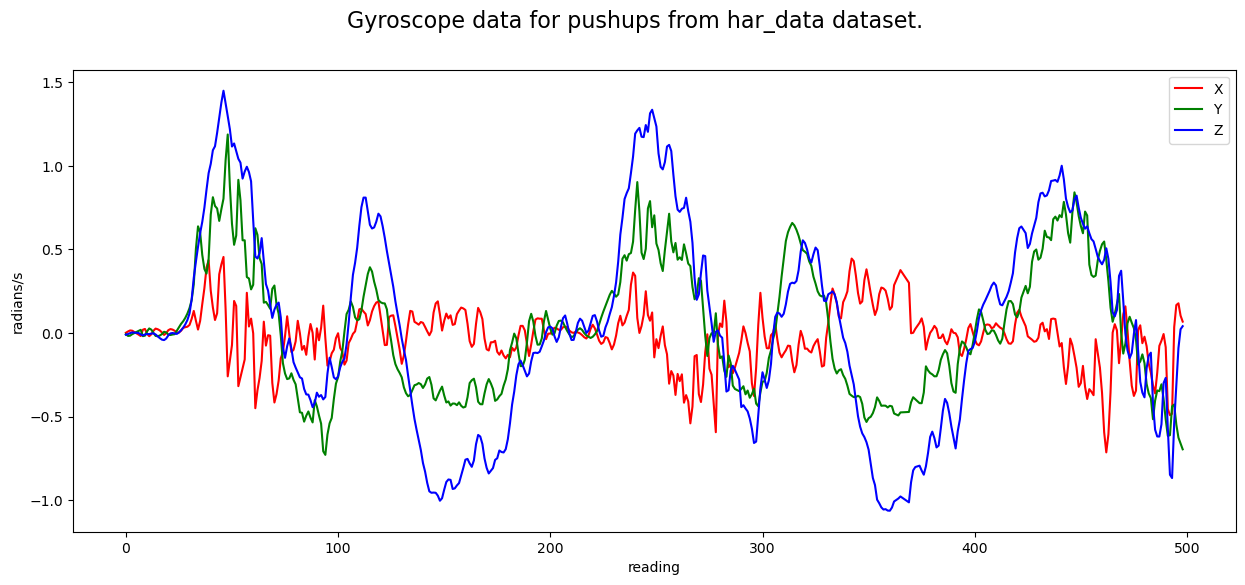

(33943, 17)


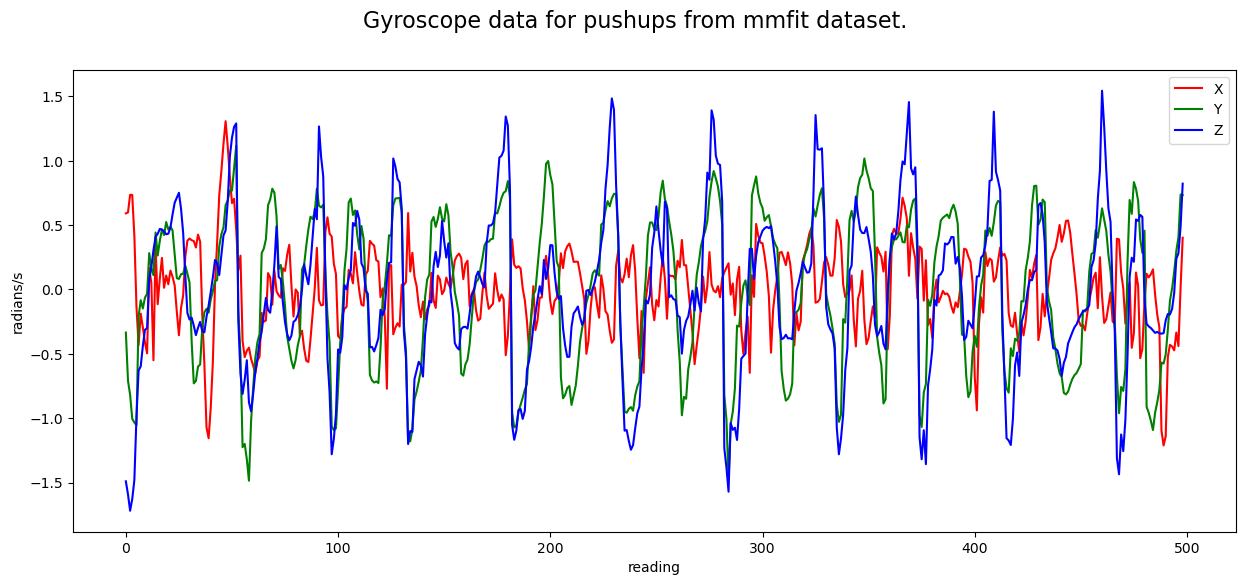

(36232, 17)


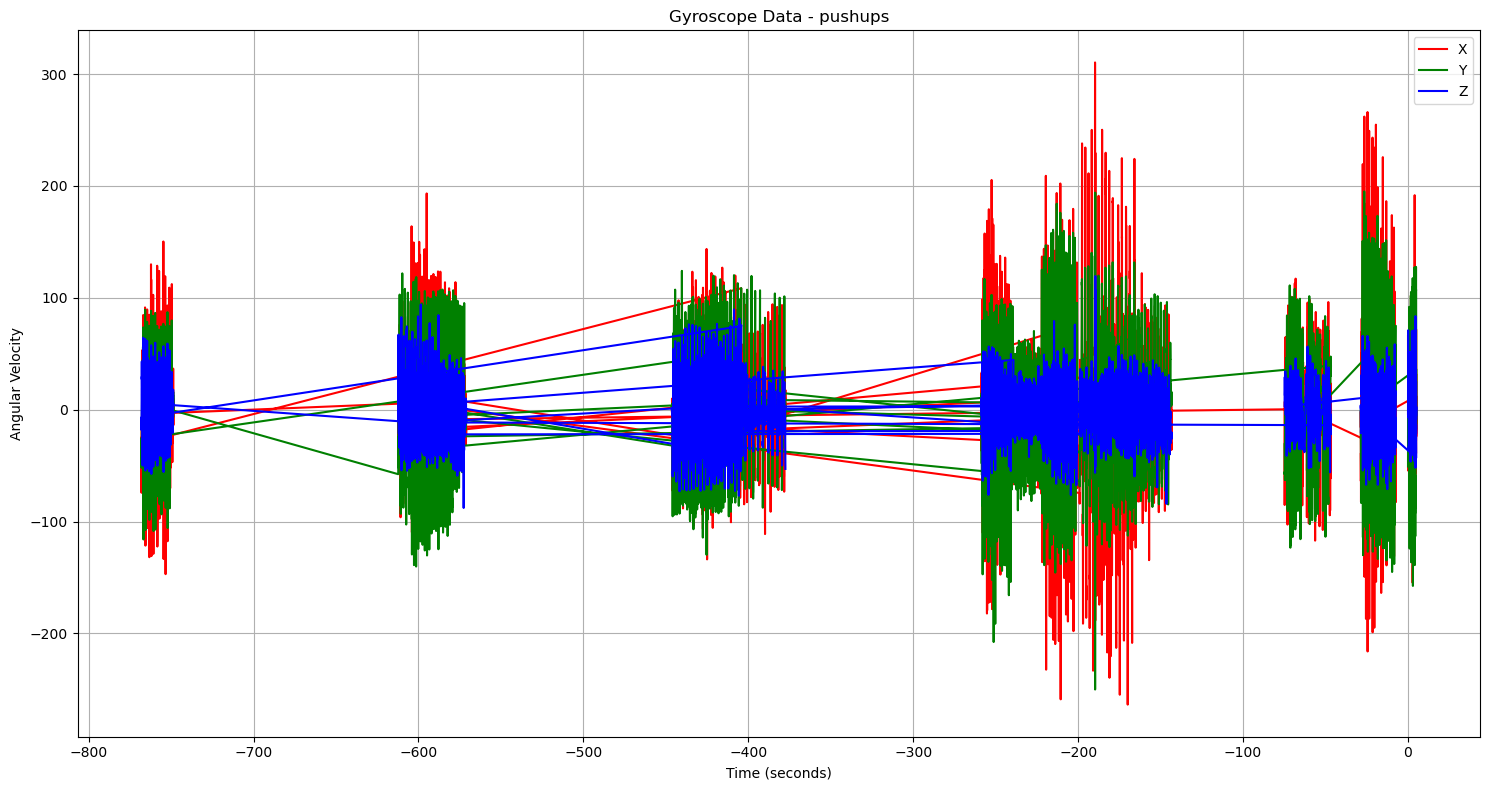

In [10]:
# graph gyropscope data from each dataset of pushes
import matplotlib.pyplot as plt
for dataset in ['har_data', 'mmfit', 'rico']:

    data_df = both_df[both_df['dataset']==dataset]
    print(data_df[data_df['label']=='pushups'].shape)

    if dataset == 'rico':
        plot_imu_data(data_df, activity='pushups', sensor_type='gyr', time_window=5)
        continue

    plot_sensor_label(data_df, 'gyr', 'pushups', seconds = 5, title = f'Gyroscope data for pushups from {dataset} dataset.')

(154126, 17)


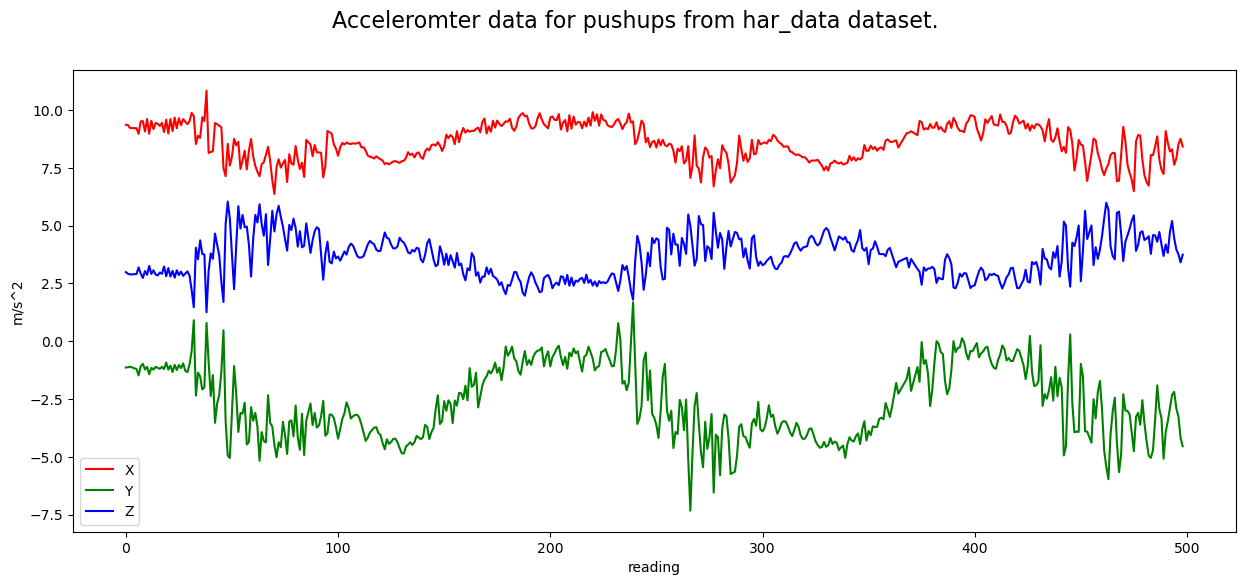

(33943, 17)


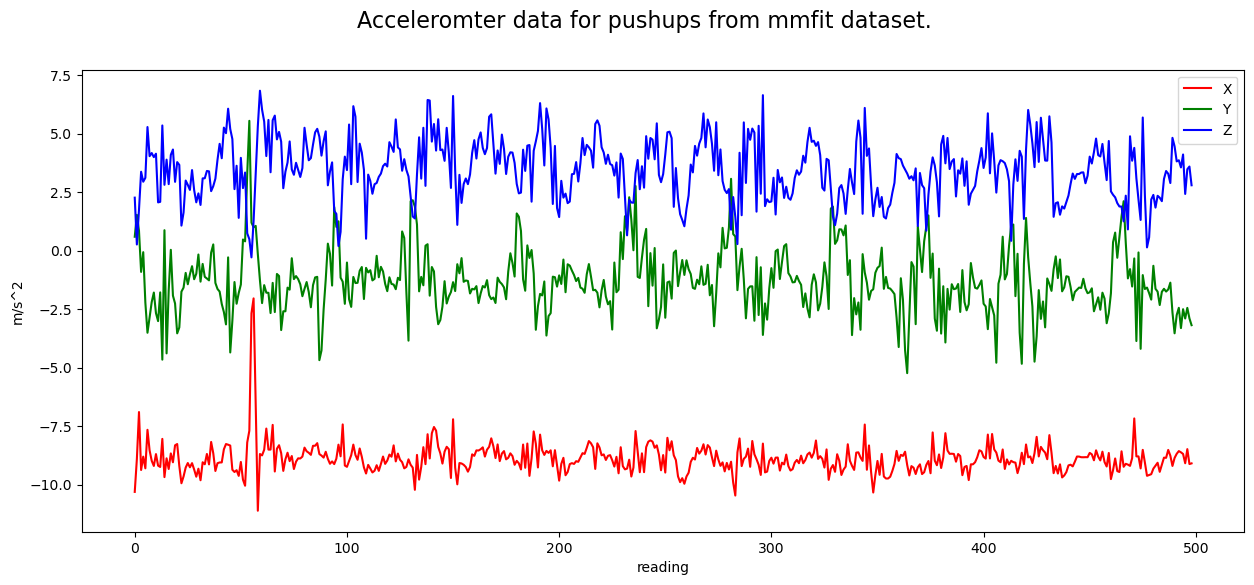

(36232, 17)


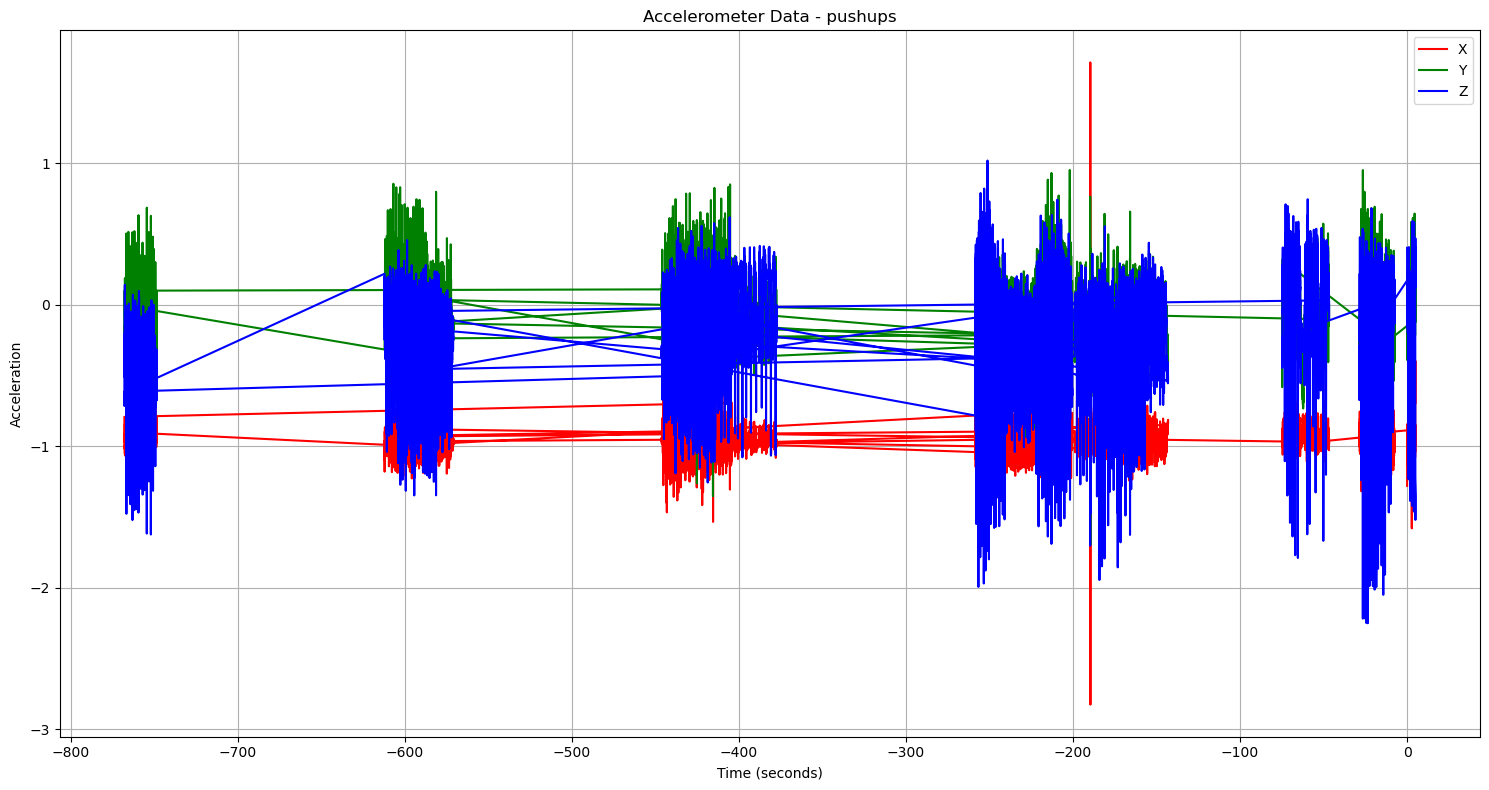

In [11]:
# graph accelerometer data from each dataset of pushes
import matplotlib.pyplot as plt
for dataset in ['har_data', 'mmfit', 'rico']:

    data_df = both_df[both_df['dataset']==dataset]
    print(data_df[data_df['label']=='pushups'].shape)
    if dataset == 'rico':
        plot_imu_data(data_df, activity='pushups', sensor_type='acc', time_window=5)
        continue

    plot_sensor_label(data_df, 'acc', 'pushups', seconds = 5, title = f'Acceleromter data for pushups from {dataset} dataset.')

From the above graphs it seems like the the final dataset is being processed differently. This will be dealt with at a later time

In [12]:
# create completely seperate 2 second pieces of data for testing/training
# this creates data in a format that could be used in a CNN
model_data = create_examples(both_df, seconds=3)

creating dataset for model


100%|██████████| 10854293/10854293 [13:15<00:00, 13651.84it/s]


In [15]:
print(f'There are {len(model_data)} rows of data for training/testing')
print('Distribution of classes within data for model')
print(model_data['label'].value_counts())

There are 28701 rows of data for training/testing
Distribution of classes within data for model
label
deviceontable                            3836
non-e                                    3534
walk                                     1625
staticstretch                            1276
staticstretch(atyourownpace)              839
                                         ... 
note                                       22
unlistedexercise                           12
alternatingdumbbellcurl                     5
tricepsextension(lyingdown)(rightarm)       4
tricepsextension(lyingdown)(leftarm)        4
Name: count, Length: 88, dtype: int64


In [14]:
# model_data.to_csv('data/2_sec_model_data.csv')
# both_df.to_csv('data/mmfit_crossfit_data.csv')